# Term project: 
### Students’ Performance EDA
#### Mohammed majjaj

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
The goal from this term project for me is to apply. I choose the students’ performance data sets for this project.
The Content of This project’s would be my application of the skills I am learning through this class to perform an EDA on a data set.  The goal is to analyze and discuss Students’ Performance using various visualization techniques in Python. The dataset used in this project was taken from: https://www.kaggle.com/spscientist/students-performance-in-exams

-------------------------------------------------------------------------------------------------------------------------------

#### Research questions  

1.	Identify the variables used in this study, is there any data cleaning or variable modification needed?
2.	Explore the dataset for a quick exploratory analysis. central tendency and measures of dispersion?
3.	Most students are part of which ethnic group?
4.	What is the distribution of students’ overall performance in Math, Reading and Writing?
5.	Which gender showed greater participation in the test preparation course?  
6.	Are students’ scores dependent on their gender? yes yes yes
7.	Does parental level of education influence students score?  
8.	Do children that complete the test preparation course attain higher scores?
9.	Is there a correlation between students’ reading and writing scores?
10.	Are students’ math and writing scores correlated?
11.	What are the variables that correlate the most with the outcome with significance?
12.	What are the variables that explains most of the variability of the outcome with significance?
13.	What assumptions are to be made?
14.	model the data and predection




#### Approach  

I will need to start by loading the data and look at it and understand what each variable is and determine if the dataset needs any cleaning slicing or dicing.  One this step is completed and comfortable with the new dataset I will start a preliminary central tendency and measure of dispersion for first insight, then I will try to answer questions already set and probably make assumption and test them, then I will try to understand what the distribution of certain variables is. Next, I will try to do a correlation analysis to understand the relationship between the variables and final outcome. next I will need to determine which machine learning models I will need to use to predict the outcome. 


### Required Packages

In [221]:
# importing necessairy packages
import pandas as pd
import numpy as np

import statistics  as st

import  thinkstats2 as think
import thinkplot


import seaborn as sb

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

### Overview of the Data Set

this data is marks secured by the students in high school
Students from the United States. 


In [9]:
# getting data
df = pd.read_csv("D:\data science\classes\DSC530 Exploratory_Data_Analysis\TERM PROJECT\stdprfmce\StudentsPerformance.csv") 
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Describing the variables in the dataset:  


There are three numeric variables (math score, reading score and writing score) which show a common maximum value of 100.  
Students’ scores show great variation across the three subjects but reading score has the narrowest range.  

The five non-numeric variables are gender, race/ethnicity, parental level of education, lunch and test preparation course.

Dataset information:  

    •  Dataset Characteristics: Multivariate
    •  Number of Instances: 1000
    •  Number of Attributes: 8
    •  three numeric variables (math score, reading score and writing score)
    •  five non-numeric variables are gender, race/ethnicity, parental level of education, lunch and test preparation course
    •  Missing Values: No  

Attribute Information:  

    •  Gender: make, female
    •  race/ethnicity: group B, group C, group A, group D, group E
    •  parental level of education: bachelor's degree, some college, master's degree, associate degree, high school, 
        some high school
    •  lunch: standard, free/reduced.
    •  test preparation course: none, completed.
    •  math score: from 0 to 100
    •  reading score: from 0 to 100
    •  writing score: from 0 to 100



##### is there any data cleaning or variable modification needed?

In [3]:
df.describe(include ='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [4]:
# checking for null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [109]:
df[(df['math score'] == 0) & (df['reading score'] == 0) & (df['writing score'] ==0)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg Language score,avg score,result


We can see that there are no missing values

In [10]:
# creat some composites scores

# a column for variable avg Language score = (reading score + writing score) / 2
df['avg Language score'] = round((df['reading score'] + df['writing score'])/2,2)

# a column for variable avg score = (math score + reading score + writing score) / 3
df['avg score'] = round((df['math score'] + df['reading score'] + df['writing score'])/3,2)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg Language score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33
4,male,group C,some college,standard,none,76,78,75,76.5,76.33


In [12]:
#creat a colomn for a variable result with passed or failed. with passing grade is 50.

result = []

for row in df['avg score']:
    
    if row >= 50:
        
        result.append('passed')
        
    else:
        result.append('failed')
    
df['result'] = result

we should now have two additional columns avg score  and result that is going to help us undesrtaind more the data.

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg Language score,avg score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67,passed
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33,passed
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33,failed
4,male,group C,some college,standard,none,76,78,75,76.5,76.33,passed


we can continue with the project and make some exploratory data analysis

### Exploratory Data Analysis

Now we will look a little deeper on some interesting plots of our data, in order to get some insights

#### math score Histogram

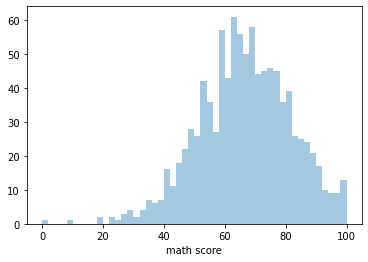

In [174]:
sb.distplot(df['math score'],
            kde = False,
            bins=50,
           )
plt.show()


#### reading score Histogram

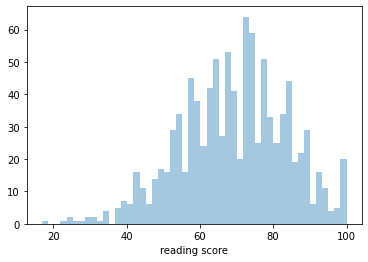

In [175]:
sb.distplot(df['reading score'],
            kde = False,
            bins=50,
           )
plt.show()


#### writing score Histogram

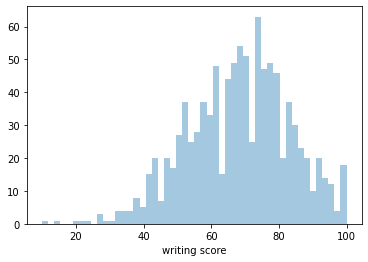

In [176]:
sb.distplot(df['writing score'],
            kde = False,
            bins=50,
           )
plt.show()


#### avg Language score Histogram

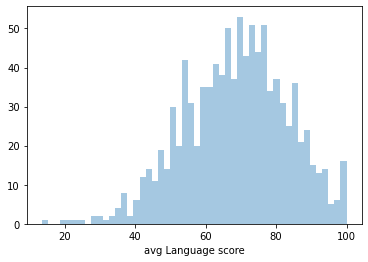

In [177]:
sb.distplot(df['avg Language score'],
            kde = False,
            bins=50,
           )
plt.show()


#### avg score Histogram

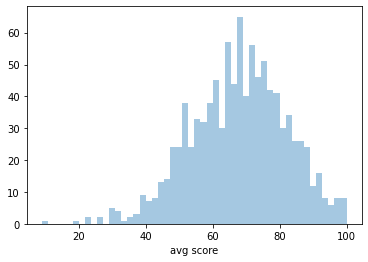

In [178]:
sb.distplot(df['avg score'],
            kde = False,
            bins=50,
           )
plt.show()


##### outliers

An outlier is a data point that comes from a distribution different from the bulk of the data. In the real world.
in our data we see a consistent few data points where the score is below 25 and away from the builk of the data around 40 and 90.  

they are legitimate observations that accurately describe the few students that scored low in some subject.
it will need more analysis to understaind the why and if there is any correlation with other variables in this study.


#####  Mean, Mode, Spread and Tails 


In [705]:
describe = df[['math score','reading score','writing score', 'avg Language score', 'avg score']].describe(include='all')
m=df['math score'].mode()
r=df['reading score'].mode()
w=df['writing score'].mode()
al=df['avg Language score'].mode()
a=df['avg score'].mode()
new_row = pd.Series(data={'math score':m, 'reading score':r, 'writing score':w, 'avg Language score':al, 'avg score':a}, name='mode')

describe= describe.append(new_row, ignore_index=False)

describe

,math score,reading score,writing score,avg Language score,avg score
count,1000,1000,1000,1000,1000
mean,66.089,69.169,68.054,68.6115,67.7706
std,15.1631,14.6002,15.1957,14.7279,14.2573
min,0,17,10,13.5,9
25%,57,59,57.75,58.5,58.33
50%,66,70,69,69.5,68.33
75%,77,79,79,79,77.67
max,100,100,100,100,100
mode,0 65 dtype: int64,0 72 dtype: int64,0 74 dtype: int64,0 67.0 1 73.0 2 75.5 dtype: float64,0 68.0 dtype: float64


Mean:  
we can see that the average student scored in the sixties point, in this order from highest to lowest. reading score, writhing then math score. we can see that the average student scored higher in avg language score then math score. and the over all avg score is 67.77  

Mode:  
the most frequest score in math is 65  
the most frequest score in reading is 72  
the most frequest score in writing is 74  
the most frequest score in avg Language are 67, 73, and 75.5  
the most frequest score in over all avg score is 68    

spread:  
we can see that the spread is very hight the diffrence between max and min value for math as an example is 100 point.
we can see that across all variables the spread is hight and the Standard variation confirm this observation.

histograms shape  and tails:  
all variable's histograms above has a bell-shaped picture, usually presents a normal distribution. with some skewness to the left where large number of occurrences in the upper value cells (right side) and few in the lower value cells (left side).


#### comparing the over all avg score between female and male:

###### calculating the PMF for avg score female and male

In [149]:
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']

female_pmf = think.Pmf(female['avg score'], label='female')

male_pmf = think.Pmf(male['avg score'], label='male')


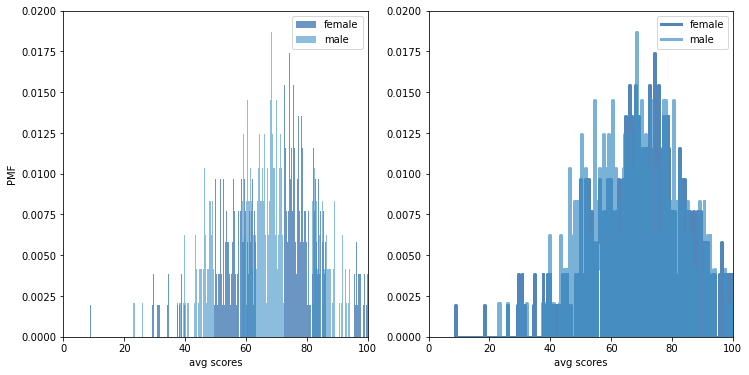

In [187]:
width=0.20
axis = [0,100, 0, 0.020]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(female_pmf, align='right', width=width)
thinkplot.Hist(male_pmf, align='left', width=width)
thinkplot.Config(xlabel='avg scores', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([female_pmf, male_pmf])
thinkplot.Config(xlabel='avg scores', axis=axis)

we can see that from the chart that female are less likely to score lower then 60. and somewhat more likely to score higher than male.  

next i will chart the difference in score between the two groups to clearly visualize the difference.

No handles with labels found to put in legend.


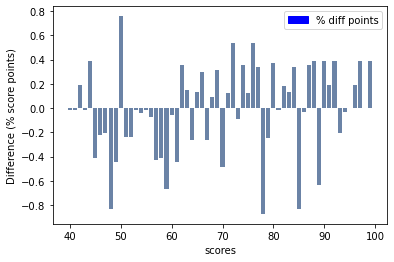

In [172]:
scores = range(40, 100)
diffs = []
for score in scores:
    p1 = female_pmf.Prob(score)
    p2 = male_pmf.Prob(score)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

import matplotlib.patches as mpatches
    
thinkplot.Bar(scores, diffs)
thinkplot.Config(xlabel='scores', ylabel='Difference (% score points)')
red_patch = mpatches.Patch(color='blue', label='% diff points')
plt.legend(handles=[red_patch])


this chart shows the difference in percentage point between the two Pmfs (female_pmf and male_pmf). it chows the result as bar chart, it makes the pater clearer: female are less likely to score lower then 60. and somewhat more likely or to score higher then male.

###### calculating the CDF for avg score for all class then female and male separately for comparason.

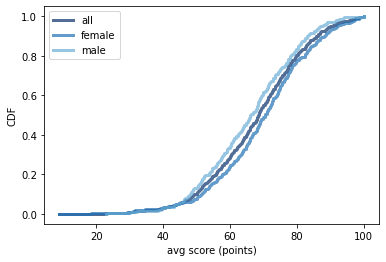

In [200]:
cdf_all = think.Cdf(df['avg score'], label='all')
cdf_female = think.Cdf(female['avg score'], label='female')
cdf_male = think.Cdf(male['avg score'], label='male')

thinkplot.PrePlot(3)
thinkplot.Cdfs([cdf_all, cdf_female, cdf_male])
thinkplot.Config(xlabel='avg score (points)', ylabel='CDF')

this figure makes the shape of the distributions, and the differences between the different groups apparent. we can see that the scores for male are consistently lower through out the distributions after 50 average score point.


##### calculating the fraction of scores less then 50 and 80  for the three groups

In [217]:
print('% of scores less then 50')
print('all : ' + str(cdf_all.Prob(50)*100))
print('female : ' + str(cdf_female.Prob(50)*100))
print('male : ' + str(cdf_male.Prob(50)*100))
#---------------
print('')
print('% of scores more 80')
print('all : ' + str(100-cdf_all.Prob(80)*100))
print('female : ' + str(100-cdf_female.Prob(80)*100))
print('male : ' + str(100-cdf_male.Prob(80)*100))

% of scores less then 50
all : 10.9
female : 8.494208494208493
male : 13.485477178423237

% of scores more 80
all : 19.39999999999999
female : 22.200772200772207
male : 16.390041493775925


analysing the fraction of scores less than 50:
   *  we can see that over all 11% of the average scores are less than or equal to the passing point 50.  
   *  only 8.5% for female  
   *  and increases to 13.5% for males  
   
analysing the fraction of scores lmore then 80:
   *  we can see that over all 19% of the average scores are more then 80.
   *  only 16% for male
   *  and increases to 22% for females 

#### from CDF chart above we also see that it looks like a CDF of a normal distribution  
#### below code will compaire a model of a normal CDF to our Data average score CDF

Mean, Var 67.77057999999998 203.06764046360001
Sigma 14.25018036600239


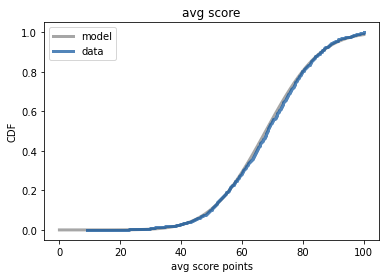

In [241]:
# calculating the mean and variance of the data average score
mu, var = think.MeanVar(df['avg score'])
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = think.RenderNormalCdf(mu, sigma, low=0, high=100)

thinkplot.Plot(xs, ps, label='model', color='0.5')

# plot the data
cdf = think.Cdf(df['avg score'], label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='avg score',
                 xlabel='avg score points',
                 ylabel='CDF')

we can see that the data fits  well the normal model.

#### we gonna test the normality of the data with normality plot.
if the data are actually from a normal distribution, the plot is approximately straight.

Here's the normal probability plot for average score, showing that the lowest avg scores are lower than we expect from the normal mode, and the highest avg scores plateau at 100.

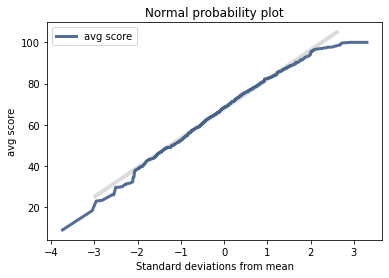

In [253]:
mu, var = think.MeanVar(df['avg score'])
std = np.sqrt(var)


fxs, fys = think.FitLine(xs, mu, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = think.NormalProbability(df['avg score'])
thinkplot.Plot(xs, ys, label='avg score')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='avg score')

If we suspect that the deviation in the left tail is due to sex gender, we can check by ploting by sex.

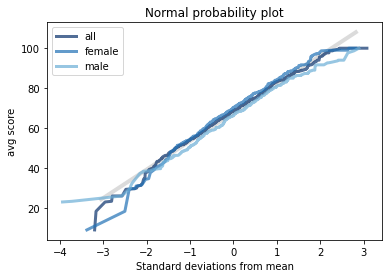

In [274]:
mean, var = think.MeanVar(df['avg score'])
std = np.sqrt(var)

#xs = [-4, 4]
#ys = [0,100]
fxs, fys = think.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(3) 
xs, ys = think.NormalProbability(df['avg score'])
thinkplot.Plot(xs, ys, label='all')

xs, ys = think.NormalProbability(female['avg score'])
thinkplot.Plot(xs, ys, label='female')

xs, ys = think.NormalProbability(male['avg score'])
thinkplot.Plot(xs, ys, label='male')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='avg score')

Now the deviation in the left tail is almost gone we look at male only and follow the normal model. but the hoghest score are still lower them female above 90point.

the low female avg scores are lowest and drops more then the male's at 40point.

on brief it means that the data follow a normal model starting at 40 to 90 and that at the tails we can see the effect of sex out side of normal model.

### more analysis on other features of the data

In [259]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg Language score,avg score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67,passed
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33,passed
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33,failed
4,male,group C,some college,standard,none,76,78,75,76.5,76.33,passed


##### plotting the relation between gender and each score

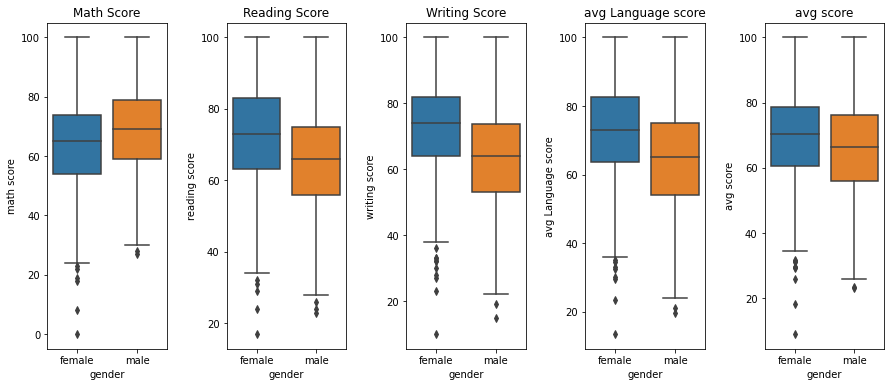

In [286]:
fig, ax = plt.subplots(figsize=(15,6), ncols=5)
fig.subplots_adjust(wspace=1/2)
ax[0].set_title('Math Score')
sb.boxplot(ax=ax[0],x=df['gender'],y=df['math score'])


ax[1].set_title('Reading Score')
sb.boxplot(ax=ax[1],x=df['gender'],y=df['reading score'])


ax[2].set_title('Writing Score')
sb.boxplot(ax=ax[2],x=df['gender'],y=df['writing score']);

ax[3].set_title('avg Language score')
sb.boxplot(ax=ax[3],x=df['gender'],y=df['avg Language score']);

ax[4].set_title('avg score')
sb.boxplot(ax=ax[4],x=df['gender'],y=df['avg score']);

* On average, female students performed better on reading score and writing score than the male students, except for on the math test.

* on average, female student performed over all based on the everage score than the male students.

* there are outliers of females more than males.

##### plotting the relation between parent_education and gender

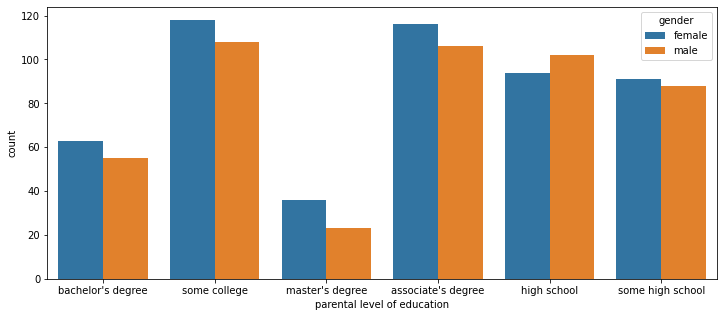

In [288]:
# plotting the relation between parent_education and gender
plt.figure(figsize=(12,5))
sb.countplot(x=df['parental level of education'],hue=df['gender']);

we find that parents education level of females are more than males ,except high school eduction level males are more.

#### Most students are part of which ethnic group?

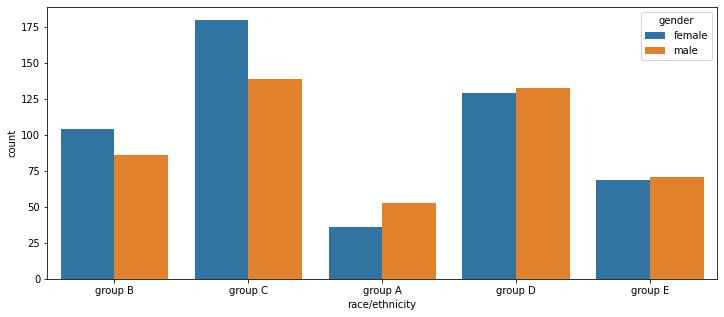

In [702]:
plt.figure(figsize=(12,5))
sb.countplot(x=df['race/ethnicity'],hue=df['gender']);

we can see that most student are from Group C, having more female than male.

#### Which gender showed greater participation in the test preparation course?

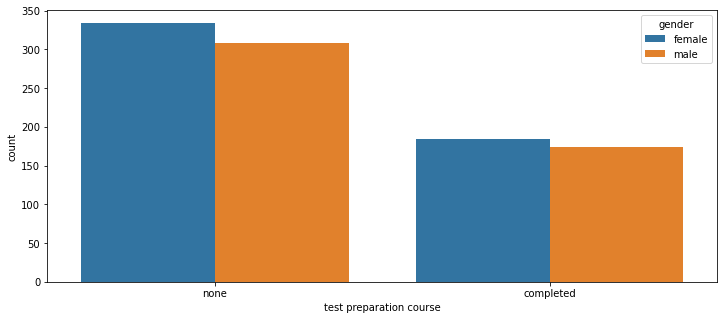

In [704]:
plt.figure(figsize=(12,5))
sb.countplot(x=df['test preparation course'],hue=df['gender']);

we can see that female showed more participation in the test preparation but the diffrence is small

### correlation Analysis

##### scater plot of writing and reading scores.

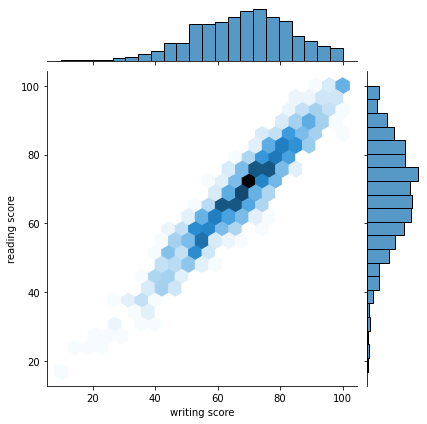

In [297]:
sb.jointplot(x = 'writing score',y = 'reading score',data = df,kind = 'hex')
plt.show()

<AxesSubplot:xlabel='writing score', ylabel='reading score'>

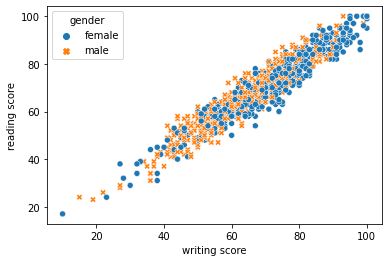

In [289]:
sns.scatterplot(data=df, x='writing score', y='reading score', hue='gender',
               style='gender')

we can see that the reading score and writing score have positive linear relationship; when a student have a high score in writing it is expected to have a high score in reading.  this is true for both femal and male students.

##### scater plot of avg Language score and math scores

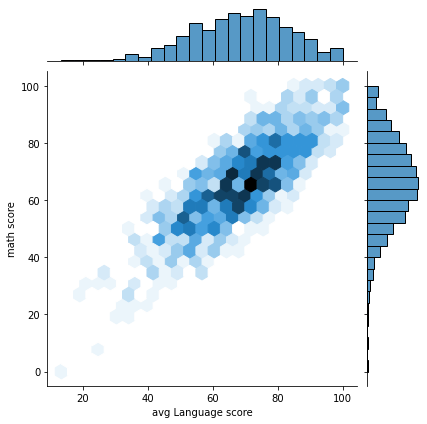

In [301]:
sb.jointplot(x = 'avg Language score',y = 'math score',data = df,kind = 'hex')
plt.show()

<AxesSubplot:xlabel='avg Language score', ylabel='math score'>

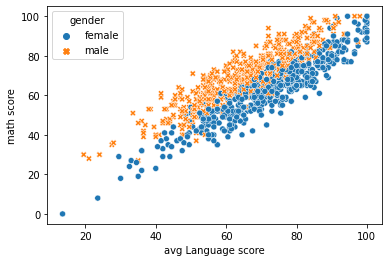

In [300]:
sns.scatterplot(data=df, x = 'avg Language score',y = 'math score', hue='gender',
               style='gender')

we can see that the avg Language score and math score have positive linear relationship; when a student have a high score in Language score it is expected to have a high score in math score.  

there is also a distinction of the degree of the relationship. we can see that there is a clear distinction between the two genders in second graph.  

for female student for a math score the corresponding language score is lower. for male student when math score is higher the corresponding language score is lower.


##### correlation matrix 

In [360]:
newdf = df[['gender','test preparation course','math score',
            'reading score', 'writing score', 'avg Language score',
            'avg score', 'result']]

In [358]:
newdf['result'].unique()

array(['passed', 'failed'], dtype=object)

In [361]:
# label encoding for gender

# male =0
# female =1

newdf['gender']= newdf['gender'].replace(['male','female'], value=[0,1]) 

# label encoding for test preparation course
# none =0
# completed = 1

newdf['test preparation course']= newdf['test preparation course'].replace(['none','completed'], value=[0,1]) 


# label encoding for result
# failed =0
# passed= 1

newdf['result']= newdf['result'].replace(['failed','passed'], value=[0,1]) 

In [362]:
newdf.head()

,gender,test preparation course,math score,reading score,writing score,avg Language score,avg score,result
0,1,0,72,72,74,73.0,72.67,1
1,1,1,69,90,88,89.0,82.33,1
2,1,0,90,95,93,94.0,92.67,1
3,0,0,47,57,44,50.5,49.33,0
4,0,0,76,78,75,76.5,76.33,1


PointbiserialrResult(correlation=-0.16798223810035565, pvalue=9.120185549328867e-08)
PointbiserialrResult(correlation=0.25671500947104037, pvalue=1.6313729799656816e-16)
PointbiserialrResult(correlation=0.5494596342331253, pvalue=5.948462615180441e-80)


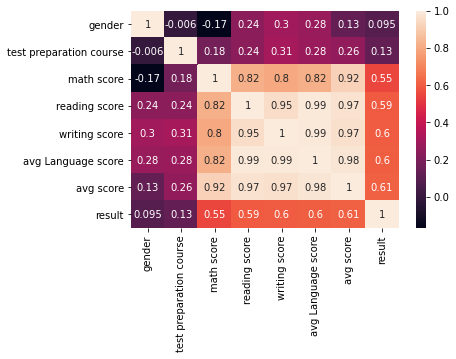

In [363]:
sns.heatmap(newdf.corr(),annot=True)

import scipy.stats as stats
print(stats.pointbiserialr(newdf['math score'],newdf['gender']))
print(stats.pointbiserialr(newdf['avg score'],newdf['test preparation course']))
print(stats.pointbiserialr(newdf['math score'],newdf['result']))


we can see from this correlation map that:  

* gender female has a negative point biserial correlation with Math score which we already have noticed from scatter plot above
* test preparation course has a positive point biserial correlation with average score and suggest that student that conducted preparing have positive results
* the writing score has strong positive correlation with reading score.
* the math score has a strong positive correlation with writing and reading score but has a stronger correlation with avg score.
* average score has a positive correlation from strongest to less strong, language score, math score, test preparation, and gender.



    

#### Conducting a hypothesis test 

**First test**  

* test the assumption we made earlier that student gender affect the Math score. will be using as a test statistic the difference in means between both groups.  
* our null hypothesis is that the apparent affect is not real (gender do not affect math score).



In [365]:
data = male['math score'].values, female['math score'].values

In [370]:
class DiffMeansPermute(think.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [371]:
#runing the test.

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

No handles with labels found to put in legend.


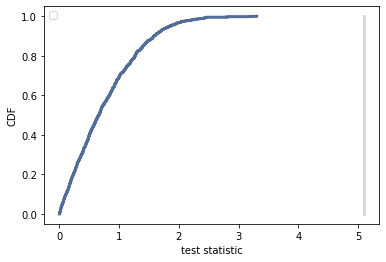

In [372]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

The reported p-value is 0 (statistically significant). which means that in 1000 trials we didn't see a difference in score mean between the two groups, under the null hypothesis, that exceeded the observed difference. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0.

To get a sense of how unexpected the observed value is under the null hypothesis, we can compare the actual diffrence to the largest value we saw in the simulations.

In [376]:
print('actual', ht.actual, 'and Max test stat', ht.MaxTestStat())

actual 5.095011134430216 and Max test stat 3.3038738204713383


**second test**  

* test the assumtion we made earlier that test preparation course affect the average score. will be using  as a test statistic the diffrence in means between both groups. (the student that conducted the preperation and the ones they didn't)  
* our null hipothesis is that the apparant affect is not real (test preparation course do not affect math score).  


In [379]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [381]:
completed = df[df['test preparation course'] == 'completed']
none = df[df['test preparation course'] == 'none']
data = completed['avg score'].values, none['avg score'].values

In [382]:
#runing the test.

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

No handles with labels found to put in legend.


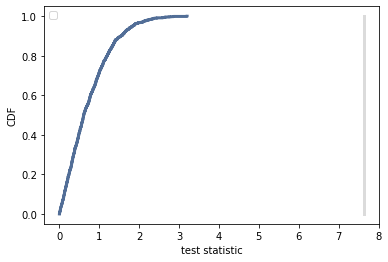

In [383]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

The reported p-value is 0 (statistically significant). which means that in 1000 trials we didn't see a difference in score mean between the two groups, under the null hypothesis, that exceeded the observed difference. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0.

To get a sense of how unexpected the observed value is under the null hypothesis, we can compare the actual diffrence to the largest value we saw in the simulations.

In [385]:
print('actual', ht.actual, 'and Max test stat', ht.MaxTestStat())

actual 7.630668650690055 and Max test stat 3.2027287283106176


### Regression Analysis

In [387]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg Language score,avg score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67,passed
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33,passed
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33,failed
4,male,group C,some college,standard,none,76,78,75,76.5,76.33,passed


in this part i will try to model gender test based on feature below.


In [599]:
df_to_model=df[['gender', 'race/ethnicity', 'parental level of education', 
                'test preparation course', 'math score', 'reading score', 'writing score']]

In [600]:
df_to_model.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


##### data processing 

In [601]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for gender
df_to_model['gender'] = le.fit_transform(df_to_model['gender'])

# label encoding for race/ethnicity

df_to_model['race/ethnicity'] = le.fit_transform(df_to_model['race/ethnicity'])
df_to_model = df_to_model.rename(columns={"race/ethnicity":"race_ethnicity"})

# label encoding for parental level of education

df_to_model['parental level of education'] = le.fit_transform(df_to_model['parental level of education'])
df_to_model = df_to_model.rename(columns={"parental level of education":"parental_education_level"})


# label encoding for test preparation course

df_to_model['test preparation course'] = le.fit_transform(df_to_model['test preparation course'])
df_to_model = df_to_model.rename(columns={"test preparation course":"test_preparation"})




df_to_model = df_to_model.rename(columns={"math score":"math_score"})
df_to_model = df_to_model.rename(columns={"writing score":"writing_score"})
df_to_model = df_to_model.rename(columns={"reading score":"reading_score"})

after the data processing and changed all categorical data to numbers we can do a map heat for the correlation 

parental level of education :  

    0  associate's degree 
    1  bachelor's degree
    2  high school 
    3  master's degree    
    4  some college   
    5  some high school 
 
gender :

    0 female
    1 male
    
race/ethnicity :

    0 group A 
    1 group B
    2 group C
    3 group D
    4 group E
    

test preparation course:

    0 completed
    1 none
  

<AxesSubplot:>

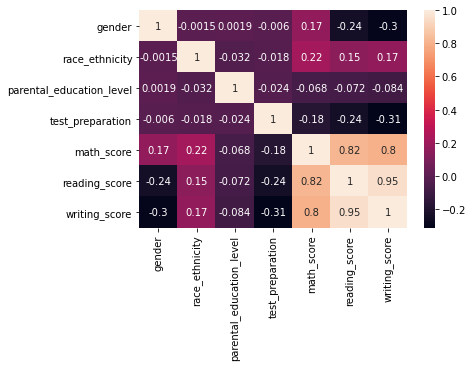

In [606]:
sns.heatmap(df_to_model.corr(),annot=True)

following functions will mine the variables and search for variables with explanatory power we have in the data to model the variable result  
it will calculate the $R^{2}$ and sort them from highest to lowest.

In [607]:
import statsmodels.formula.api as smf
import patsy
def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = 'gender ~ race_ethnicity + ' + name
            
            # The following seems to be required in some environments
            # formula = formula.encode('ascii')

            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError):
            continue

        variables.append((results.rsquared, name))

    return variables

In [608]:
import patsy

variables = GoMining(df_to_model)

In [609]:
import re

def MiningReport(variables, n=30):
    """Prints variables with the highest R^2.

    t: list of (R^2, variable name) pairs
    n: number of pairs to print
    """
    variables.sort(reverse=True)
    for r2, name in variables[:n]:
        key = re.sub('_r$', '', name)
        print(name, r2)

In [610]:
MiningReport(variables) 

gender 1.0
writing_score 0.09314596340636594
reading_score 0.0608685324566377
math_score 0.029721516288994665
test_preparation 3.892092855461993e-05
parental_education_level 5.737920306891908e-06
race_ethnicity 2.2557768403208556e-06


#### now we can build or Logistic regression model to predict variable gender.

In [648]:
df_to_model['male'] = (df_to_model['gender']==1).astype(int)   


In [665]:
import statsmodels.formula.api as smf

formula= 'male ~ writing_score + reading_score + math_score + test_preparation + race_ethnicity + parental_education_level'
model = smf.logit(formula,data=df_to_model)
res = model.fit()
print(res.summary())



Optimization terminated successfully.
         Current function value: 0.250514
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   male   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Sat, 06 Mar 2021   Pseudo R-squ.:                  0.6382
Time:                        20:18:14   Log-Likelihood:                -250.51
converged:                       True   LL-Null:                       -692.50
Covariance Type:            nonrobust   LLR p-value:                1.097e-187
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.8594      0.769      7.618      0.000       4.352

To make a prediction, we have to extract the exogenous and endogenous variables.

In [666]:
ndog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

The baseline prediction strategy is to guess "male". In that case, we're right almost 48% of the time.

In [667]:
actual = ndog['male']
baseline = actual.mean()
baseline

0.482

If we use the previous model, we can compute the number of predictions we get right.

In [670]:
predict = (res.predict() >= 0.50)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
print('True Positive :', sum(true_pos), 'True Negative :', sum(true_neg))

True Positive : 428.0 True Negative : 463.0


And the accuracy, which is higher than the baseline.

In [671]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.891

To make a prediction for an individual, we have to get their information into a `DataFrame`.

writing_score = 75  
reading_score=70  
math_score=75 
test_preparation none  
race_ethnicity group C  
parental_education_level high school 

In [700]:
columns = ['writing_score', 'reading_score', 'math_score', 'test_preparation', 'race_ethnicity', 'parental_education_level']
new = pd.DataFrame([[75,70,75,0,2,5]], columns=columns)
y = res.predict(new)
y*100

0    89.75927
dtype: float64

This student has a ~90% chance of being a male (according to the model).